# CODE TO PERFORM SIMPLE LINEAR REGRESSION ON FUEL CONSUMPTION DATASET


# PROBLEM STATEMENT

- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). You gathered the data:
- Data set:
    - Independant variable X: Vehicle Horse Power 
    - Dependant variable Y: Mileage Per Gallon (MPG) 

# STEP #1: LIBRARIES IMPORT


In [27]:
!pip install --upgrade seaborn
!pip install --upgrade pandas


/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrad

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# STEP #2: IMPORT DATASET

In [29]:
fueleconomy_df = pd.read_csv("FuelEconomy.csv")

In [32]:
fueleconomy_df

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
...,...,...
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593


In [31]:
fueleconomy_df.head(6)

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
5,175.838106,24.173571


In [33]:
fueleconomy_df.tail()

,Horse Power,Fuel Economy (MPG)
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593
99,184.123053,25.196097


In [6]:
fueleconomy_df.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [34]:
fueleconomy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


# STEP#3: VISUALIZE DATASET

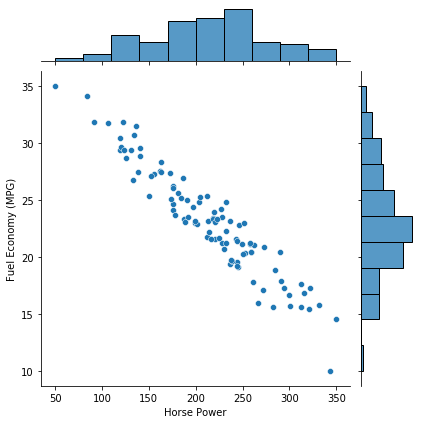

In [35]:
sns.jointplot(x='Horse Power', y='Fuel Economy (MPG)', data = fueleconomy_df)

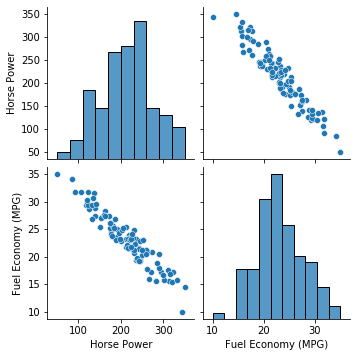

In [36]:
sns.pairplot(fueleconomy_df)

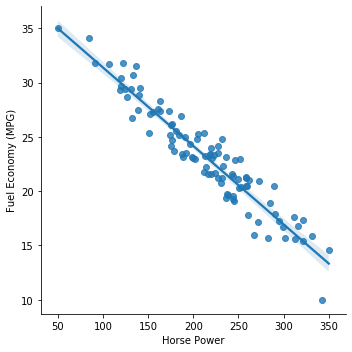

In [37]:
sns.lmplot(x='Horse Power', y='Fuel Economy (MPG)', data=fueleconomy_df)

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [38]:
X = fueleconomy_df[['Horse Power']]

In [39]:
y = fueleconomy_df['Fuel Economy (MPG)']

In [40]:
X

,Horse Power
0,118.770799
1,176.326567
2,219.262465
3,187.310009
4,218.594340
...,...
95,162.810542
96,266.869640
97,243.831211
98,140.959803


In [41]:
y

0     29.344195
1     24.695934
2     23.952010
3     23.384546
4     23.426739
        ...    
95    27.418661
96    15.989945
97    19.253375
98    29.515593
99    25.196097
Name: Fuel Economy (MPG), Length: 100, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# STEP#5: TRAIN THE MODEL

In [43]:
X_train.shape

(75, 1)

In [44]:
X_test.shape

(25, 1)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
regressor = LinearRegression(fit_intercept =True)

In [47]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [-0.07206118]
Linear Model Coefficient (b):  38.64889771522646


# STEP#6: TEST THE MODEL 

In [49]:
y_predict = regressor.predict( X_test)
y_predict

array([13.42748624, 19.08849634, 23.19289299, 22.78833486, 21.60126019,
       25.79100127, 21.915096  , 29.85454022, 21.52189578, 21.60899152,
       21.04014825, 22.93184504, 24.31172764, 19.8643908 , 27.44948361,
       18.11660823, 19.97185223, 28.68537854, 22.48254381, 27.01742616,
       25.96762828, 21.08490551, 20.93479023, 16.95457944, 20.53095225])

In [50]:
y_test

30    14.589079
6     17.163583
76    22.183092
75    21.582643
16    23.185280
25    23.719583
83    21.216359
22    31.796612
90    19.723462
79    19.367337
47    19.536770
40    23.299372
80    23.172223
94    17.802706
12    27.294930
57    18.878350
15    20.467374
34    27.473415
84    21.701202
48    27.544627
31    26.188478
42    21.442703
52    22.849711
35    15.725650
56    22.965773
Name: Fuel Economy (MPG), dtype: float64

Text(0.5, 1.0, 'HP vs. MPG (Training dataset)')

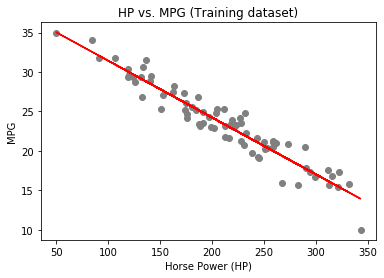

In [51]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs. MPG (Training dataset)')

Text(0.5, 1.0, 'HP vs. MPG (Testing dataset)')

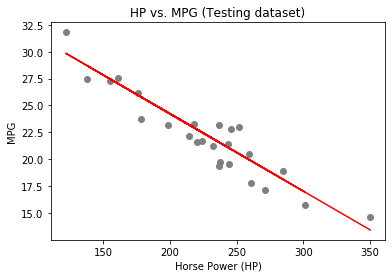

In [52]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs. MPG (Testing dataset)')

In [53]:
HP = [[240]]
y_predict = regressor.predict(HP)
y_predict

array([21.35421556])

# EXCELLENT JOB! NOW YOU BECAME EXPERT IN SIMPLE LINEAR REGRESSION